## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Load Data

In [2]:
# Load the CSV file
df = pd.read_csv('BTC_1Jan2025_to_30Nov2025 (1).csv', header=[0, 1], index_col=0)

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (334, 5)

First few rows:


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-01-01,94419.757812,94929.867188,92788.125000,93425.101562,24519888919
2025-01-02,96886.875000,97739.820312,94201.570312,94416.289062,46009564411
2025-01-03,98107.429688,98956.914062,96034.617188,96881.726562,35611391163
2025-01-04,98236.226562,98734.429688,97562.976562,98106.992188,22342608078
2025-01-05,98314.960938,98813.304688,97291.765625,98233.906250,20525254825


## 3. Data Cleaning and Preprocessing

In [3]:
# Flatten multi-level columns
df.columns = df.columns.get_level_values(0)

# Convert index to datetime
df.index = pd.to_datetime(df.index)
df.index.name = 'Date'

# Remove 'Ticker' row if it exists in the data
df = df[df.index != 'Ticker']

# Convert all columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("✓ Data cleaned successfully")
print(f"\nDate range: {df.index.min()} to {df.index.max()}")
print(f"Total records: {len(df)}")

df.head()

✓ Data cleaned successfully

Date range: 2025-01-01 00:00:00 to 2025-11-30 00:00:00
Total records: 334


Price,Close,High,Low,Open,Volume
Date,,,,,
2025-01-01,94419.757812,94929.867188,92788.125000,93425.101562,24519888919
2025-01-02,96886.875000,97739.820312,94201.570312,94416.289062,46009564411
2025-01-03,98107.429688,98956.914062,96034.617188,96881.726562,35611391163
2025-01-04,98236.226562,98734.429688,97562.976562,98106.992188,22342608078
2025-01-05,98314.960938,98813.304688,97291.765625,98233.906250,20525254825


## 4. Missing Values Analysis

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})

print("Missing Values Summary:")
print(missing_df)
print(f"\nTotal missing values: {missing_values.sum()}")

# Visualize missing values
if missing_values.sum() > 0:
    plt.figure(figsize=(10, 5))
    missing_df['Missing Count'].plot(kind='bar', color='coral')
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.xlabel('Column', fontsize=12)
    plt.ylabel('Missing Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No missing values found!")

Missing Values Summary:
        Missing Count  Percentage
Price                            
Close               0         0.0
High                0         0.0
Low                 0         0.0
Open                0         0.0
Volume              0         0.0

Total missing values: 0

✓ No missing values found!


## 5. Handle Missing Values

In [5]:
# Create a copy for processing
df_clean = df.copy()

# Strategy 1: Forward fill for price columns (uses previous day's value)
price_columns = ['Open', 'High', 'Low', 'Close', 'Price']
for col in price_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(method='ffill')

# Strategy 2: Fill remaining with backward fill
df_clean = df_clean.fillna(method='bfill')

# Strategy 3: If still missing, use interpolation
df_clean = df_clean.interpolate(method='linear', limit_direction='both')

# Check if any missing values remain
remaining_missing = df_clean.isnull().sum().sum()
print(f"Remaining missing values after cleaning: {remaining_missing}")

if remaining_missing == 0:
    print("✓ All missing values handled successfully!")
else:
    print(f"⚠ Warning: {remaining_missing} missing values still remain")

df_clean.head()

Remaining missing values after cleaning: 0
✓ All missing values handled successfully!


Price,Close,High,Low,Open,Volume
Date,,,,,
2025-01-01,94419.757812,94929.867188,92788.125000,93425.101562,24519888919
2025-01-02,96886.875000,97739.820312,94201.570312,94416.289062,46009564411
2025-01-03,98107.429688,98956.914062,96034.617188,96881.726562,35611391163
2025-01-04,98236.226562,98734.429688,97562.976562,98106.992188,22342608078
2025-01-05,98314.960938,98813.304688,97291.765625,98233.906250,20525254825


## 6. Statistical Summary

In [6]:
# Descriptive statistics
print("Statistical Summary:")
print("="*80)
df_clean.describe().round(2)

Statistical Summary:


Price,Close,High,Low,Open,Volume
count,334.00,334.00,334.00,334.00,3.340000e+02
mean,102822.09,104394.51,101084.75,102829.86,5.348414e+10
std,11582.74,11455.80,11764.18,11575.38,2.428231e+10
min,76271.95,80823.89,74436.68,76273.56,9.863214e+09
25%,94529.04,95787.21,93081.94,94530.69,3.675181e+10
50%,104705.49,106169.82,103136.80,104707.14,5.049687e+10
75%,111710.73,113444.99,110227.96,111708.45,6.788239e+10
max,124752.53,126198.07,123196.05,124752.14,1.817464e+11


In [7]:
# Additional insights
print("\nKey Insights:")
print("="*80)

if 'Close' in df_clean.columns:
    print(f"Highest Close Price: ${df_clean['Close'].max():,.2f} on {df_clean['Close'].idxmax().strftime('%Y-%m-%d')}")
    print(f"Lowest Close Price: ${df_clean['Close'].min():,.2f} on {df_clean['Close'].idxmin().strftime('%Y-%m-%d')}")
    print(f"Average Close Price: ${df_clean['Close'].mean():,.2f}")
    print(f"Price Volatility (Std Dev): ${df_clean['Close'].std():,.2f}")
    
    # Price change
    price_change = df_clean['Close'].iloc[-1] - df_clean['Close'].iloc[0]
    price_change_pct = (price_change / df_clean['Close'].iloc[0]) * 100
    print(f"\nPrice Change (Period): ${price_change:,.2f} ({price_change_pct:+.2f}%)")

if 'Volume' in df_clean.columns:
    print(f"\nAverage Daily Volume: {df_clean['Volume'].mean():,.0f}")
    print(f"Highest Volume Day: {df_clean['Volume'].idxmax().strftime('%Y-%m-%d')} ({df_clean['Volume'].max():,.0f})")


Key Insights:
Highest Close Price: $124,752.53 on 2025-10-06
Lowest Close Price: $76,271.95 on 2025-04-08
Average Close Price: $102,822.09
Price Volatility (Std Dev): $11,582.74

Price Change (Period): $-4,025.45 (-4.26%)

Average Daily Volume: 53,484,136,207
Highest Volume Day: 2025-07-14 (181,746,419,401)


## 7. Feature Engineering

In [8]:
# Create additional features for analysis
if 'Close' in df_clean.columns:
    # Daily returns
    df_clean['Daily_Return'] = df_clean['Close'].pct_change() * 100
    
    # Moving averages
    df_clean['MA_7'] = df_clean['Close'].rolling(window=7).mean()
    df_clean['MA_30'] = df_clean['Close'].rolling(window=30).mean()
    df_clean['MA_90'] = df_clean['Close'].rolling(window=90).mean()
    
    # Volatility (rolling standard deviation)
    df_clean['Volatility_7'] = df_clean['Daily_Return'].rolling(window=7).std()
    df_clean['Volatility_30'] = df_clean['Daily_Return'].rolling(window=30).std()

if all(col in df_clean.columns for col in ['High', 'Low', 'Close']):
    # Daily price range
    df_clean['Daily_Range'] = df_clean['High'] - df_clean['Low']
    df_clean['Daily_Range_Pct'] = (df_clean['Daily_Range'] / df_clean['Close']) * 100

print("✓ Features engineered successfully")
print(f"\nTotal features: {len(df_clean.columns)}")
print("\nNew columns created:")
print(df_clean.columns.tolist()[-8:])

df_clean.tail()

✓ Features engineered successfully

Total features: 13

New columns created:
['Daily_Return', 'MA_7', 'MA_30', 'MA_90', 'Volatility_7', 'Volatility_30', 'Daily_Range', 'Daily_Range_Pct']


Price,Close,High,Low,Open,Volume,Daily_Return,MA_7,MA_30,MA_90,Volatility_7,Volatility_30,Daily_Range,Daily_Range_Pct
Date,,,,,,,,,,,,,
2025-11-26,90518.367188,90581.156250,86316.898438,87345.585938,66496301869,3.636831,87043.824777,98852.547656,108688.874740,3.026537,2.372094,4264.257812,4.710931
2025-11-27,91285.375000,91897.578125,90089.515625,90517.765625,57040622845,0.847350,87708.607143,98130.188021,108498.591840,1.987865,2.388987,1808.062500,1.980671
2025-11-28,90919.265625,92969.085938,90257.117188,91285.382812,60895830289,-0.401060,88541.261161,97492.320052,108299.827344,1.747394,2.362532,2711.968750,2.982832
2025-11-29,90851.757812,91187.617188,90260.187500,90918.742188,37921773455,-0.074250,89427.460938,96910.527083,108106.661198,1.691560,2.356997,927.429688,1.020816
2025-11-30,90394.312500,91965.046875,90394.312500,90838.210938,38497902869,-0.503507,89940.218750,96271.798698,107897.146962,1.626413,2.334813,1570.734375,1.737647


## 8. Trend Visualizations

### 8.1 Price Trend Over Time

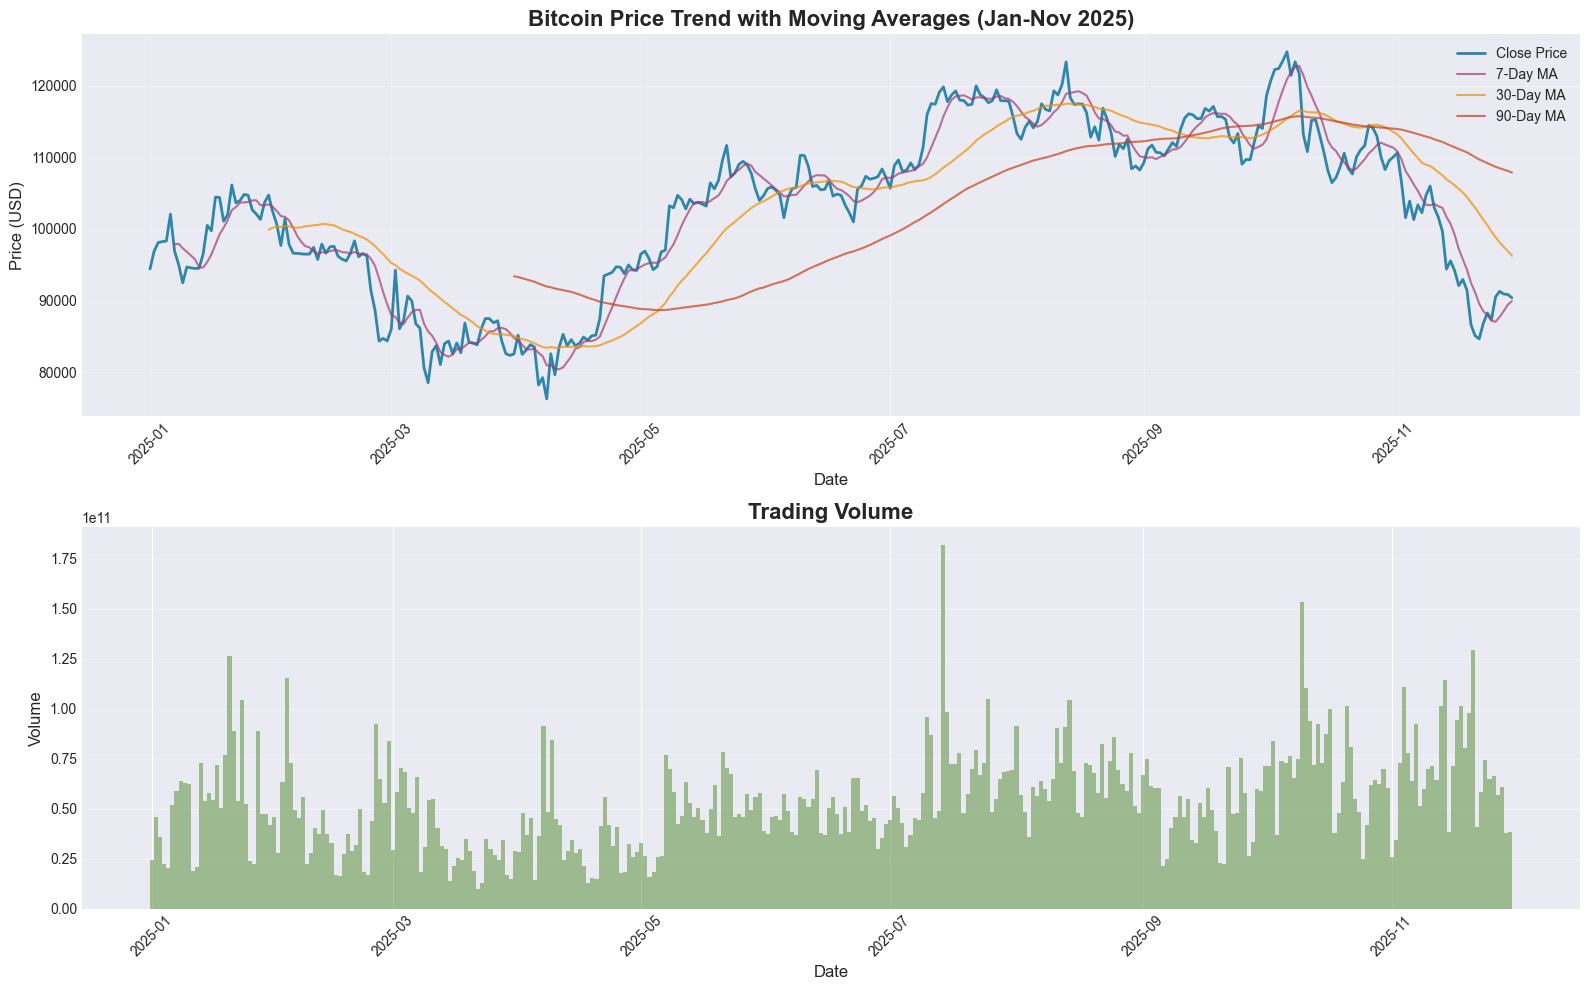

In [9]:
# Create a comprehensive price chart
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Closing price with moving averages
axes[0].plot(df_clean.index, df_clean['Close'], label='Close Price', linewidth=2, color='#2E86AB')
axes[0].plot(df_clean.index, df_clean['MA_7'], label='7-Day MA', linewidth=1.5, color='#A23B72', alpha=0.7)
axes[0].plot(df_clean.index, df_clean['MA_30'], label='30-Day MA', linewidth=1.5, color='#F18F01', alpha=0.7)
axes[0].plot(df_clean.index, df_clean['MA_90'], label='90-Day MA', linewidth=1.5, color='#C73E1D', alpha=0.7)

axes[0].set_title('Bitcoin Price Trend with Moving Averages (Jan-Nov 2025)', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Price (USD)', fontsize=12)
axes[0].legend(loc='best', fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Volume
axes[1].bar(df_clean.index, df_clean['Volume'], color='#6A994E', alpha=0.6, width=1)
axes[1].set_title('Trading Volume', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Volume', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 8.2 Candlestick-style Price Range

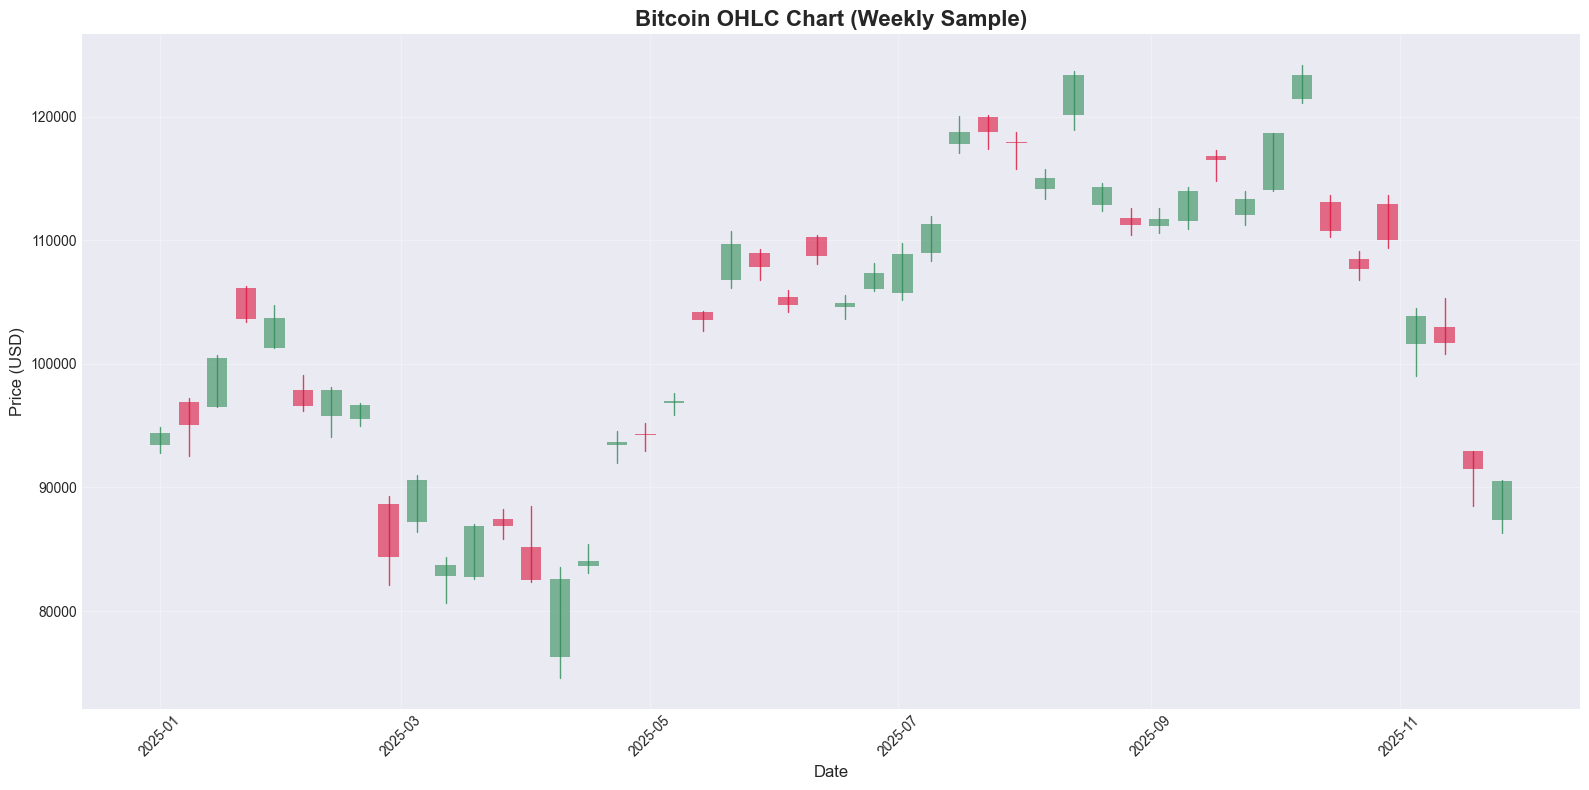

In [10]:
# OHLC visualization
fig, ax = plt.subplots(figsize=(16, 8))

# Sample every 7 days for clarity
df_weekly = df_clean.iloc[::7].copy()

for idx, row in df_weekly.iterrows():
    color = '#2E8B57' if row['Close'] >= row['Open'] else '#DC143C'
    
    # High-Low line
    ax.plot([idx, idx], [row['Low'], row['High']], color=color, linewidth=1, alpha=0.8)
    
    # Open-Close box
    box_height = abs(row['Close'] - row['Open'])
    box_bottom = min(row['Open'], row['Close'])
    ax.bar(idx, box_height, bottom=box_bottom, width=5, color=color, alpha=0.6)

ax.set_title('Bitcoin OHLC Chart (Weekly Sample)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price (USD)', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 8.3 Daily Returns Distribution

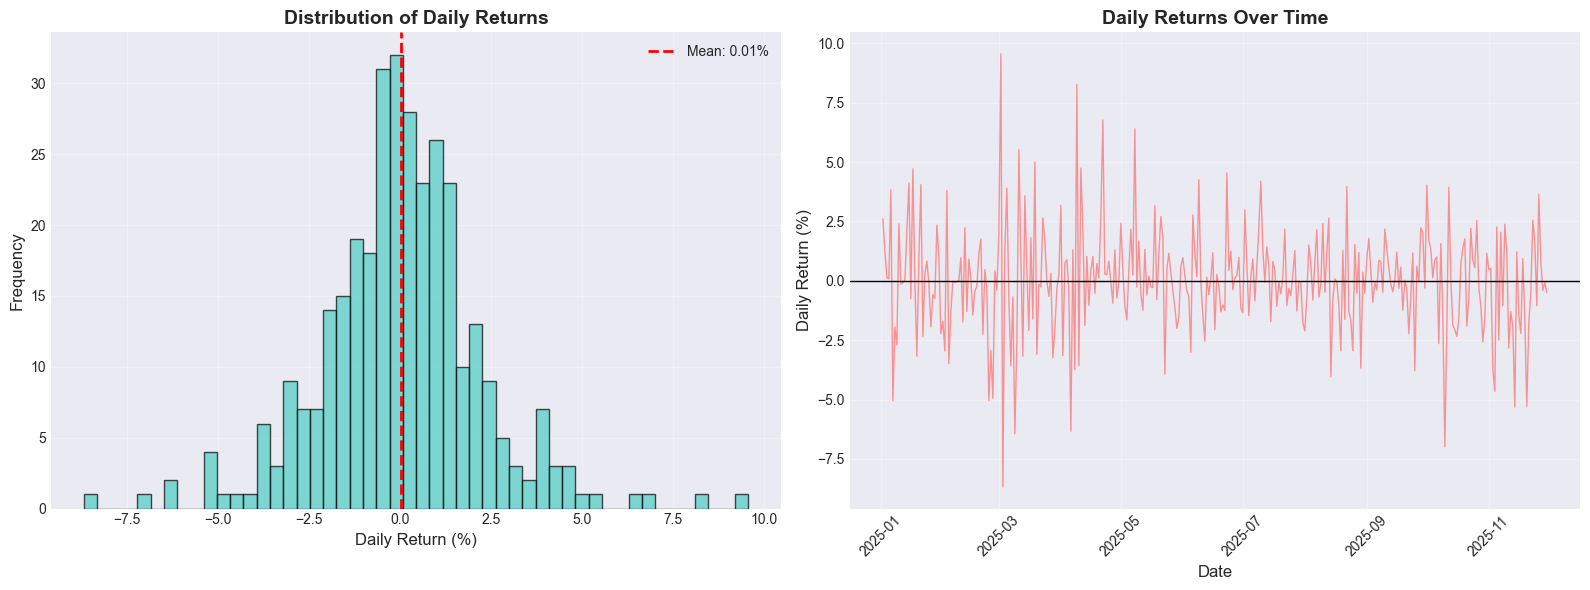

Daily Return Statistics:
Mean: 0.011%
Std Dev: 2.219%
Min: -8.682%
Max: 9.550%


In [11]:
# Analyze daily returns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(df_clean['Daily_Return'].dropna(), bins=50, color='#4ECDC4', edgecolor='black', alpha=0.7)
axes[0].axvline(df_clean['Daily_Return'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["Daily_Return"].mean():.2f}%')
axes[0].set_title('Distribution of Daily Returns', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Daily Return (%)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Time series of returns
axes[1].plot(df_clean.index, df_clean['Daily_Return'], color='#FF6B6B', linewidth=1, alpha=0.7)
axes[1].axhline(0, color='black', linestyle='-', linewidth=1)
axes[1].set_title('Daily Returns Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Daily Return (%)', fontsize=12)
axes[1].grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"Daily Return Statistics:")
print(f"Mean: {df_clean['Daily_Return'].mean():.3f}%")
print(f"Std Dev: {df_clean['Daily_Return'].std():.3f}%")
print(f"Min: {df_clean['Daily_Return'].min():.3f}%")
print(f"Max: {df_clean['Daily_Return'].max():.3f}%")

### 8.4 Volatility Analysis

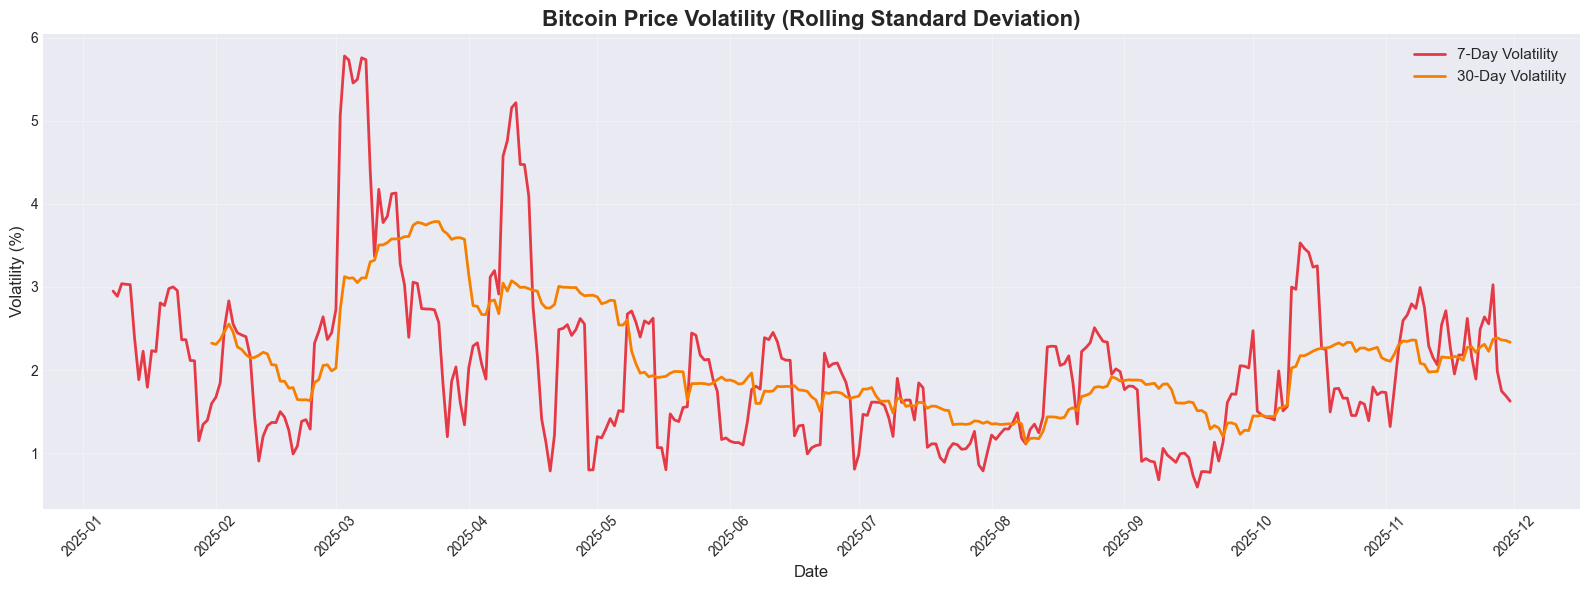

In [12]:
# Plot volatility over time
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(df_clean.index, df_clean['Volatility_7'], label='7-Day Volatility', linewidth=2, color='#E63946')
ax.plot(df_clean.index, df_clean['Volatility_30'], label='30-Day Volatility', linewidth=2, color='#F77F00')

ax.set_title('Bitcoin Price Volatility (Rolling Standard Deviation)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Volatility (%)', fontsize=12)
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 8.5 Correlation Heatmap

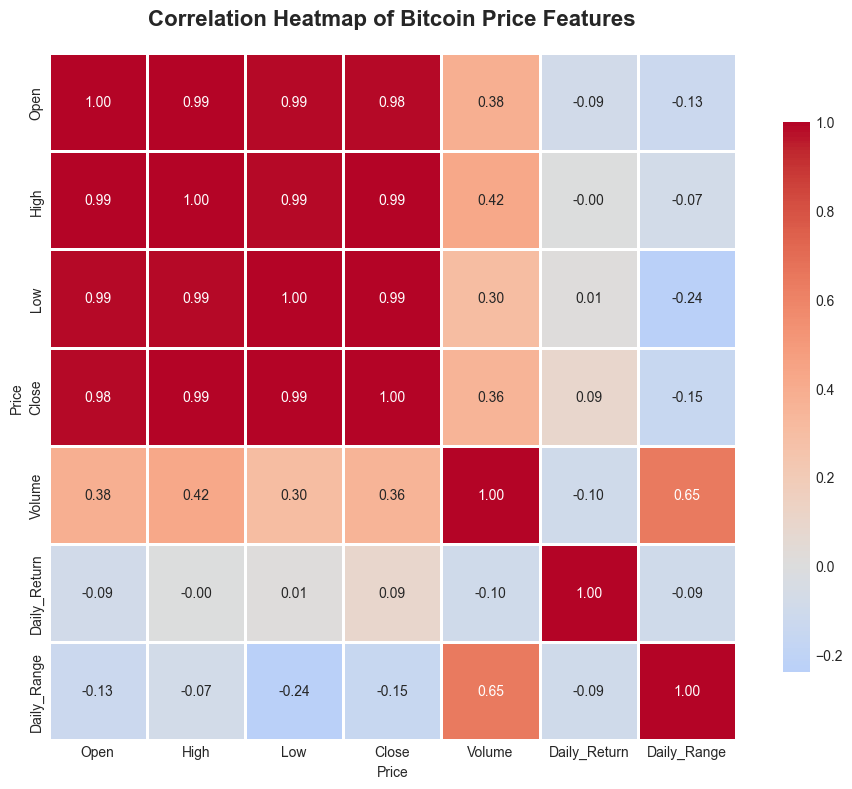

In [13]:
# Select numeric columns for correlation
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'Daily_Range']
corr_cols = [col for col in numeric_cols if col in df_clean.columns]

# Calculate correlation matrix
correlation_matrix = df_clean[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Bitcoin Price Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### 8.6 Monthly Analysis

Monthly Statistics:
Price        Close                                       Volume Daily_Return
              mean        min        max      std          mean         mean
Month                                                                       
2025-01   99992.85   92484.04  106146.27  4031.87  5.383366e+10         0.30
2025-02   95290.71   84347.02  101405.42  4448.93  4.490274e+10        -0.67
2025-03   85075.98   78532.00   94248.35  3145.94  3.385275e+10        -0.01
2025-04   86447.72   76271.95   94978.75  5621.73  3.536580e+10         0.48
2025-05  103644.51   94315.98  111673.28  4771.67  4.827089e+10         0.36
2025-06  105825.25  100987.14  110294.10  2138.34  4.747593e+10         0.09
2025-07  115363.24  105698.28  119995.41  4492.89  6.649478e+10         0.26
2025-08  114834.94  108236.71  123344.06  3559.90  6.607671e+10        -0.20
2025-09  113173.05  109049.29  117137.20  2535.23  4.834728e+10         0.18
2025-10  114085.43  106467.79  124752.53  5729.71  7.177

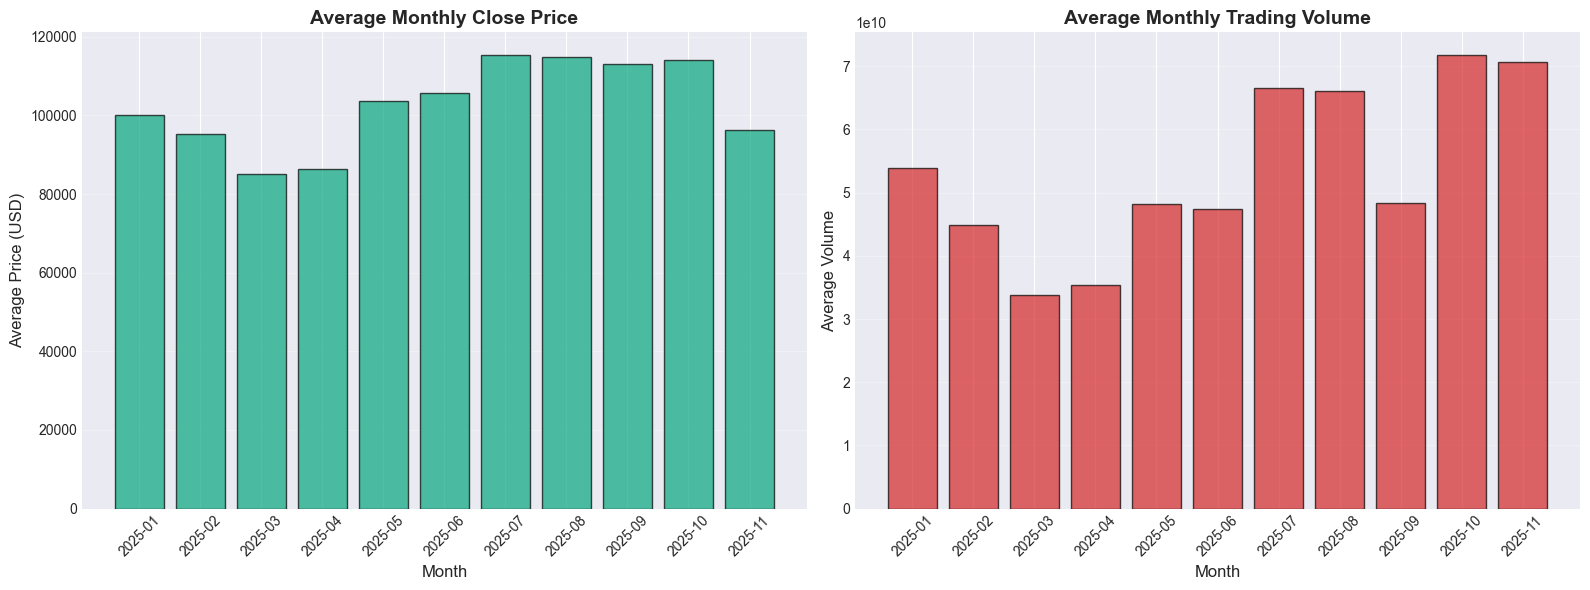

In [14]:
# Group by month
df_clean['Month'] = df_clean.index.to_period('M')
monthly_stats = df_clean.groupby('Month').agg({
    'Close': ['mean', 'min', 'max', 'std'],
    'Volume': 'mean',
    'Daily_Return': 'mean'
}).round(2)

print("Monthly Statistics:")
print("="*80)
print(monthly_stats)

# Visualize monthly average price
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Monthly average close price
monthly_avg = df_clean.groupby('Month')['Close'].mean()
axes[0].bar(range(len(monthly_avg)), monthly_avg.values, color='#06A77D', edgecolor='black', alpha=0.7)
axes[0].set_xticks(range(len(monthly_avg)))
axes[0].set_xticklabels([str(m) for m in monthly_avg.index], rotation=45)
axes[0].set_title('Average Monthly Close Price', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Average Price (USD)', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='y')

# Monthly average volume
monthly_vol = df_clean.groupby('Month')['Volume'].mean()
axes[1].bar(range(len(monthly_vol)), monthly_vol.values, color='#D62828', edgecolor='black', alpha=0.7)
axes[1].set_xticks(range(len(monthly_vol)))
axes[1].set_xticklabels([str(m) for m in monthly_vol.index], rotation=45)
axes[1].set_title('Average Monthly Trading Volume', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Average Volume', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 8.7 Box Plot Analysis

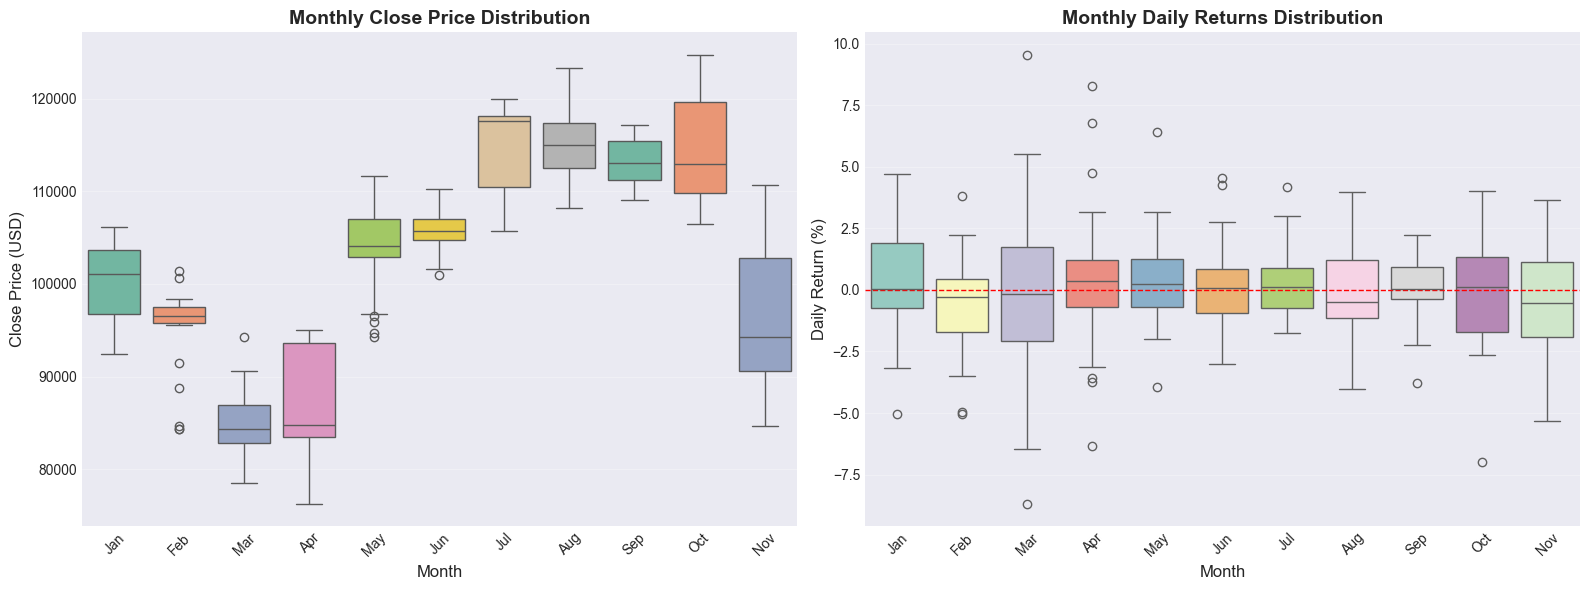

In [15]:
# Box plots for monthly distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Monthly close price distribution
df_clean['Month_Name'] = df_clean.index.strftime('%b')
sns.boxplot(data=df_clean, x='Month_Name', y='Close', ax=axes[0], palette='Set2')
axes[0].set_title('Monthly Close Price Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Close Price (USD)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Daily return distribution by month
sns.boxplot(data=df_clean, x='Month_Name', y='Daily_Return', ax=axes[1], palette='Set3')
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_title('Monthly Daily Returns Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Daily Return (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 9. Save Cleaned Data

In [16]:
# Save the cleaned and processed dataset
output_filename = 'BTC_cleaned_processed.csv'
df_clean.to_csv(output_filename)

print(f"✓ Cleaned data saved to: {output_filename}")
print(f"\nFinal dataset shape: {df_clean.shape}")
print(f"Columns: {list(df_clean.columns)}")

✓ Cleaned data saved to: BTC_cleaned_processed.csv

Final dataset shape: (334, 15)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume', 'Daily_Return', 'MA_7', 'MA_30', 'MA_90', 'Volatility_7', 'Volatility_30', 'Daily_Range', 'Daily_Range_Pct', 'Month', 'Month_Name']


## 10. Summary Report

In [17]:
print("="*80)
print("BITCOIN DATA ANALYSIS SUMMARY REPORT")
print("="*80)
print(f"\nAnalysis Period: {df_clean.index.min().strftime('%B %d, %Y')} to {df_clean.index.max().strftime('%B %d, %Y')}")
print(f"Total Trading Days: {len(df_clean)}")
print(f"\nPRICE STATISTICS:")
print("-" * 80)
print(f"Starting Price: ${df_clean['Close'].iloc[0]:,.2f}")
print(f"Ending Price: ${df_clean['Close'].iloc[-1]:,.2f}")
print(f"Highest Price: ${df_clean['Close'].max():,.2f} ({df_clean['Close'].idxmax().strftime('%Y-%m-%d')})")
print(f"Lowest Price: ${df_clean['Close'].min():,.2f} ({df_clean['Close'].idxmin().strftime('%Y-%m-%d')})")
print(f"Average Price: ${df_clean['Close'].mean():,.2f}")
print(f"Price Range: ${df_clean['Close'].max() - df_clean['Close'].min():,.2f}")

price_change = df_clean['Close'].iloc[-1] - df_clean['Close'].iloc[0]
price_change_pct = (price_change / df_clean['Close'].iloc[0]) * 100
print(f"\nOVERALL PERFORMANCE:")
print("-" * 80)
print(f"Price Change: ${price_change:,.2f} ({price_change_pct:+.2f}%)")
print(f"Average Daily Return: {df_clean['Daily_Return'].mean():.3f}%")
print(f"Return Volatility: {df_clean['Daily_Return'].std():.3f}%")

print(f"\nTRADING VOLUME:")
print("-" * 80)
print(f"Average Daily Volume: {df_clean['Volume'].mean():,.0f}")
print(f"Total Volume: {df_clean['Volume'].sum():,.0f}")
print(f"Highest Volume Day: {df_clean['Volume'].idxmax().strftime('%Y-%m-%d')} ({df_clean['Volume'].max():,.0f})")

print(f"\nDATA QUALITY:")
print("-" * 80)
print(f"Missing Values: {df_clean.isnull().sum().sum()} (after cleaning)")
print(f"Features Created: {len(df_clean.columns)}")
print("\n✓ Analysis Complete!")
print("="*80)

BITCOIN DATA ANALYSIS SUMMARY REPORT

Analysis Period: January 01, 2025 to November 30, 2025
Total Trading Days: 334

PRICE STATISTICS:
--------------------------------------------------------------------------------
Starting Price: $94,419.76
Ending Price: $90,394.31
Highest Price: $124,752.53 (2025-10-06)
Lowest Price: $76,271.95 (2025-04-08)
Average Price: $102,822.09
Price Range: $48,480.58

OVERALL PERFORMANCE:
--------------------------------------------------------------------------------
Price Change: $-4,025.45 (-4.26%)
Average Daily Return: 0.011%
Return Volatility: 2.219%

TRADING VOLUME:
--------------------------------------------------------------------------------
Average Daily Volume: 53,484,136,207
Total Volume: 17,863,701,492,988
Highest Volume Day: 2025-07-14 (181,746,419,401)

DATA QUALITY:
--------------------------------------------------------------------------------
Missing Values: 162 (after cleaning)
Features Created: 15

✓ Analysis Complete!
